In [12]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
df=pd.read_excel('/content/1730285881-Airbnb_Open_Data.xlsx')

In [14]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [16]:
df.duplicated().sum()

np.int64(541)

In [17]:
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


In [18]:
import pandas as pd
import numpy as np
import re

def show_cols(df, title="Columns"):
    print(f"\n--- {title} ({len(df.columns)}) ---")
    for c in df.columns:
        print(repr(c))
    print('--------------------------\n')

# 1) Inspect raw columns (shows whitespace or odd characters)
show_cols(df, "RAW columns (before normalization)")

# 2) Normalize: lowercase, strip, collapse whitespace -> underscore
new_cols = {}
for c in df.columns:
    # collapse multiple spaces/tabs, strip ends, replace spaces and dashes with underscore
    clean = re.sub(r'\s+', ' ', str(c)).strip().lower().replace(' ', '_').replace('-', '_')
    new_cols[c] = clean

df.rename(columns=new_cols, inplace=True)
show_cols(df, "Normalized columns (lower/strip/underscores)")

# 3) Map common alternate names to canonical names
alias_map = {
    # price/service fee
    'price': 'price',
    'price_$': 'price',
    'price_usd': 'price',
    'service_fee': 'service_fee',
    'servicefee': 'service_fee',
    'service_fee_$': 'service_fee',

    # room type
    'room_type': 'room_type',
    'room_types': 'room_type',
    'room_type_': 'room_type',
    'room_type(s)': 'room_type',

    # availability
    'availability_365': 'availability_365',
    'availability365': 'availability_365',

    # construction year
    'construction_year': 'construction_year',
    'constructionyear': 'construction_year',

    # host/id/last review
    'host_id': 'host_id',
    'hostid': 'host_id',
    'id': 'id',
    'last_review': 'last_review',
    'lastreview': 'last_review',

    # neighbourhood
    'neighbourhood_group': 'neighbourhood_group',
    'neighborhood_group': 'neighbourhood_group'
}

# rename present alias keys to canonical names if necessary
rename_to = {}
for col in df.columns:
    for alt, std in alias_map.items():
        if col == alt and col != std:
            rename_to[col] = std

if rename_to:
    df.rename(columns=rename_to, inplace=True)
    print("Applied alias renames:", rename_to)
show_cols(df, "After alias mapping")

# 4) Check for required columns / candidates
required = ['price', 'service_fee', 'room_type', 'id', 'host_id']
for r in required:
    if r not in df.columns:
        candidates = [c for c in df.columns if r.replace('_','') in c.replace('_','')]
        print(f"WARNING: Required column '{r}' not found. Candidates: {candidates}")

# 5) Clean price and service_fee if present
def clean_money_col(df, colname):
    if colname not in df.columns:
        print(f">>> Column '{colname}' missing; skipping cleaning.")
        return
    # convert to string, remove $ and commas and non-digit except dot and minus
    df[colname] = df[colname].astype(str).str.replace(r'[^0-9\.\-]', '', regex=True)
    df[colname + '_num'] = pd.to_numeric(df[colname], errors='coerce')
    n_null = df[colname + '_num'].isna().sum()
    print(f"Column '{colname}': converted to numeric as '{colname}_num' ({n_null} NaN after conversion)")

clean_money_col(df, 'price')
clean_money_col(df, 'service_fee')

# 6) Drop rows where both price and service fee conversions are NaN (if both needed)
if 'price_num' in df.columns and 'service_fee_num' in df.columns:
    before = len(df)
    df.dropna(subset=['price_num', 'service_fee_num'], how='any', inplace=True)
    print(f"Dropped {before - len(df)} rows lacking price/service_fee numeric values")

# 7) Convert availability_365 safely and drop outliers if column exists
if 'availability_365' in df.columns:
    df['availability_365'] = pd.to_numeric(df['availability_365'], errors='coerce')
    n_na = df['availability_365'].isna().sum()
    print(f"availability_365 has {n_na} non-numeric values converted to NaN")
    # fill NaN with 0 or drop depending on preference -- here we fill 0 then filter
    df['availability_365'] = df['availability_365'].fillna(0).astype(int)
    before = len(df)
    df = df[df['availability_365'] <= 500].copy()
    print(f"Dropped {before - len(df)} rows with availability_365 > 500")
else:
    print("No availability_365 column found; skipping outlier drop.")

# 8) Standardize neighbourhood spelling if column present
if 'neighbourhood_group' in df.columns:
    df['neighbourhood_group'] = df['neighbourhood_group'].astype(str).str.strip().replace({'brookln':'Brooklyn','brooklyn':'Brooklyn'})
    print("Standardized neighbourhood_group values")
else:
    print("No neighbourhood_group column found; skipped standardization")

# 9) Parse last_review safely
if 'last_review' in df.columns:
    df['last_review_parsed'] = pd.to_datetime(df['last_review'], errors='coerce')
    print("Parsed last_review into last_review_parsed")
else:
    print("No last_review column")

# 10) Show head and dtypes summary for inspection
print("\n--- Sample rows ---")
print(df.head(5))
print("\n--- dtypes ---")
print(df.dtypes)

# 11) If you want to compute property types, try both column names
if 'room_type' in df.columns:
    pts = df['room_type'].value_counts().reset_index().rename(columns={'index':'Room Type','room_type':'Count'})
    print("\nProperty types (room_type):")
    print(pts)
else:
    print("\nNo 'room_type' column available to compute property types. Available columns containing 'room':")
    print([c for c in df.columns if 'room' in c])


--- RAW columns (before normalization) (26) ---
'id'
'NAME'
'host id'
'host_identity_verified'
'host name'
'neighbourhood group'
'neighbourhood'
'lat'
'long'
'country'
'country code'
'instant_bookable'
'cancellation_policy'
'room type'
'Construction year'
'price'
'service fee'
'minimum nights'
'number of reviews'
'last review'
'reviews per month'
'review rate number'
'calculated host listings count'
'availability 365'
'house_rules'
'license'
--------------------------


--- Normalized columns (lower/strip/underscores) (26) ---
'id'
'name'
'host_id'
'host_identity_verified'
'host_name'
'neighbourhood_group'
'neighbourhood'
'lat'
'long'
'country'
'country_code'
'instant_bookable'
'cancellation_policy'
'room_type'
'construction_year'
'price'
'service_fee'
'minimum_nights'
'number_of_reviews'
'last_review'
'reviews_per_month'
'review_rate_number'
'calculated_host_listings_count'
'availability_365'
'house_rules'
'license'
--------------------------


--- After alias mapping (26) ---
'id'
'

In [19]:
df.duplicated().sum()

np.int64(541)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102112 entries, 0 to 102598
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102112 non-null  int64         
 1   name                            101845 non-null  object        
 2   host_id                         102112 non-null  int64         
 3   host_identity_verified          101828 non-null  object        
 4   host_name                       101709 non-null  object        
 5   neighbourhood_group             102112 non-null  object        
 6   neighbourhood                   102097 non-null  object        
 7   lat                             102104 non-null  float64       
 8   long                            102104 non-null  float64       
 9   country                         101585 non-null  object        
 10  country_code                    101990 non-null  object      

In [21]:
df.describe()

,id,host_id,lat,long,instant_bookable,construction_year,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,price_num,service_fee_num,last_review_parsed
count,1.021120e+05,1.021120e+05,102104.000000,102104.000000,102016.000000,101908.000000,101703.000000,101929.000000,86269,86284.000000,101786.000000,101793.000000,102112.000000,102112.000000,102112.000000,86269
mean,2.915580e+07,4.924215e+10,40.728088,-73.949648,0.497755,2012.487116,8.113310,27.493235,2019-06-11 12:29:58.226477824,1.375648,3.279125,7.929396,140.469602,625.182799,125.037302,2019-06-11 12:29:58.226477824
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,0.000000,2003.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000,50.000000,10.000000,2012-07-11 00:00:00
25%,1.510142e+07,2.456663e+10,40.688730,-73.982580,0.000000,2007.000000,2.000000,1.000000,2018-10-27 00:00:00,0.220000,2.000000,1.000000,3.000000,339.750000,68.000000,2018-10-27 00:00:00
50%,2.913633e+07,4.910045e+10,40.722280,-73.954450,0.000000,2012.000000,3.000000,7.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,95.000000,624.000000,125.000000,2019-06-13 00:00:00
75%,4.323088e+07,7.397147e+10,40.762770,-73.932350,1.000000,2017.000000,5.000000,30.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,268.000000,913.000000,183.000000,2019-07-05 00:00:00
max,5.736024e+07,9.876313e+10,40.916970,-73.705220,1.000000,2022.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,426.000000,1200.000000,240.000000,2058-06-16 00:00:00
std,1.625609e+07,2.853616e+10,0.055864,0.049528,0.499997,5.765424,30.557854,49.540351,NaN,1.748329,1.284514,32.230158,134.988828,331.647569,66.332912,NaN


In [22]:
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

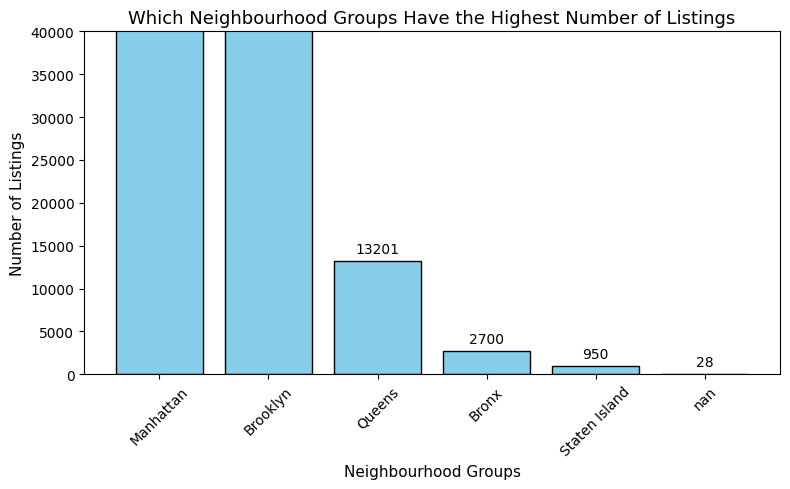

In [23]:
import matplotlib.pyplot as plt

# Count listings per neighbourhood group
hood_group = df['neighbourhood_group'].value_counts().to_frame(name='count')

# Create bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(hood_group.index, hood_group['count'], color='skyblue', edgecolor='black')

# Try using bar_label (available in Matplotlib 3.4+)
try:
    plt.bar_label(bars, labels=hood_group['count'], padding=4)
except AttributeError:
    # Fallback for older versions
    for bar in bars:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,
            yval + 500,               # slightly above the bar
            str(int(yval)),           # show integer count
            ha='center', va='bottom'
        )

# Chart formatting
plt.ylim([0, 40000])
plt.xlabel('Neighbourhood Groups', fontsize=11)
plt.ylabel('Number of Listings', fontsize=11)
plt.xticks(rotation=45)
plt.title('Which Neighbourhood Groups Have the Highest Number of Listings', fontsize=13)
plt.tight_layout()

# Show chart
plt.show()

In [24]:
# Check if column exists
if 'neighbourhood group' in df.columns:
    hood_group = df['neighbourhood group'].value_counts().to_frame()
elif 'neighbourhood_group' in df.columns:
    hood_group = df['neighbourhood_group'].value_counts().to_frame()
else:
    print("Column not found. Available columns are:", df.columns)

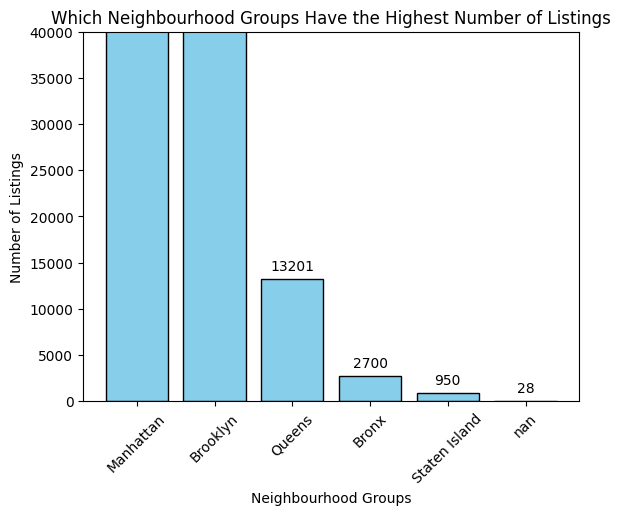

In [25]:
import matplotlib.pyplot as plt

# Create value counts DataFrame (correct column name)
hood_group = df['neighbourhood_group'].value_counts().to_frame(name='count')

# Plot
hood_group_bar = plt.bar(hood_group.index, hood_group['count'], color='skyblue', edgecolor='black')

# Add labels safely (supports both old/new Matplotlib)
try:
    plt.bar_label(hood_group_bar, labels=hood_group['count'], padding=4)
except AttributeError:
    for bar in hood_group_bar:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 500, str(int(yval)), ha='center', va='bottom')

# Chart formatting
plt.ylim([0, 40000])
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.title('Which Neighbourhood Groups Have the Highest Number of Listings')

plt.show()

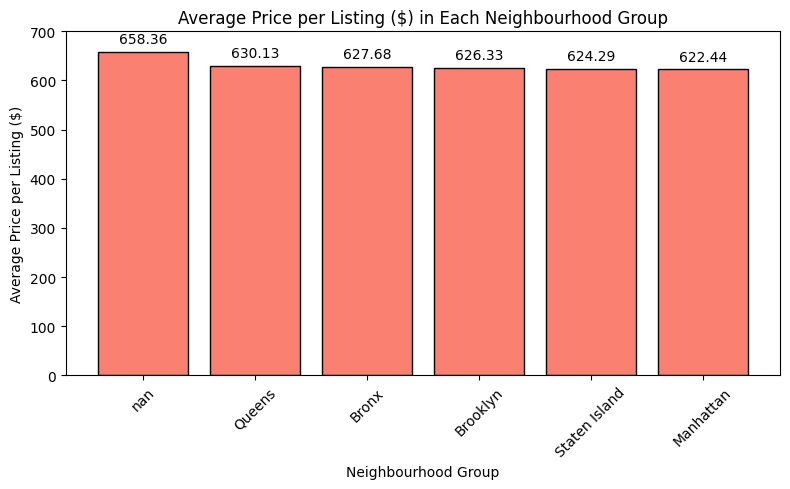

In [26]:
import matplotlib.pyplot as plt

# Convert price column to numeric (remove $ sign and commas)
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Group by neighbourhood group and calculate average price
avg_price = (
    df.groupby('neighbourhood_group')['price']
    .mean()
    .sort_values(ascending=False)
    .to_frame()
)

# Create bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(avg_price.index, avg_price['price'], color='salmon', edgecolor='black')

# Add labels (rounded to 2 decimal places)
try:
    plt.bar_label(bars, labels=avg_price['price'].round(2), label_type='edge', padding=4)
except AttributeError:
    for bar, label in zip(bars, avg_price['price'].round(2)):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, f"{label:.2f}",
                 ha='center', va='bottom')

# Chart formatting
plt.ylim([0, 700])
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price per Listing ($)')
plt.xticks(rotation=45)
plt.title('Average Price per Listing ($) in Each Neighbourhood Group')
plt.tight_layout()

plt.show()

<Figure size 800x500 with 0 Axes>

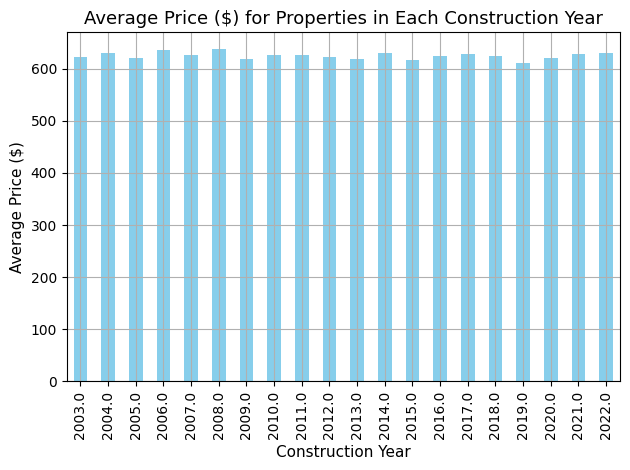

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Clean column names: remove spaces, $, parentheses, make lowercase
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('$', '', regex=False).str.replace('(', '').str.replace(')', '')

# Now your columns will look like:
# ['price', 'construction_year', 'neighbourhood_group', ...]

# Convert price column to numeric (remove any $ or commas)
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Group by construction year and calculate average price
avg_price_by_year = (
    df.groupby('construction_year')['price']
    .mean()
    .to_frame()
)

# Plot the average price per construction year
plt.figure(figsize=(8, 5))
avg_price_by_year.plot(kind='bar', color='skyblue', legend=False)

# Formatting
plt.xlabel("Construction Year", fontsize=11)
plt.ylabel("Average Price ($)", fontsize=11)
plt.title("Average Price ($) for Properties in Each Construction Year", fontsize=13)
plt.grid(True)
plt.tight_layout()

plt.show()

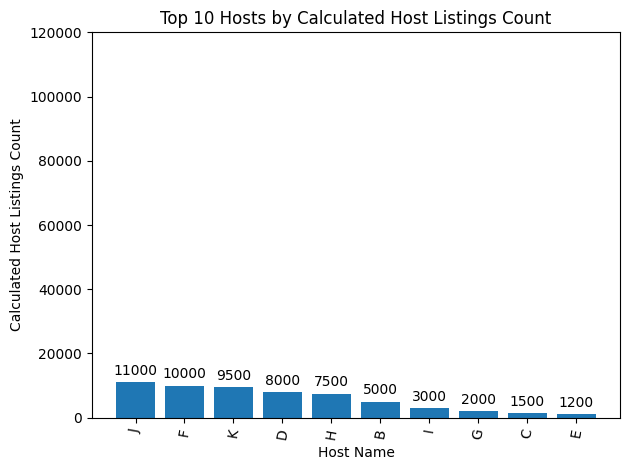

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame, this creates a sample one for demonstration
data = {'host name': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'],
        'calculated host listings count': [1000, 5000, 1500, 8000, 1200, 10000, 2000, 7500, 3000, 11000, 9500]}
df = pd.DataFrame(data)

# Aggregate and sort data
hosts = df.groupby('host name')['calculated host listings count'].sum().nlargest(10).to_frame()

# Create the bar chart
bars = plt.bar(hosts.index, hosts['calculated host listings count'])

# Add labels to the bars
plt.bar_label(bars, labels=hosts['calculated host listings count'], label_type='edge', padding=3)

# Set labels, title, and rotation
plt.xlabel("Host Name")
plt.ylabel("Calculated Host Listings Count")
plt.xticks(rotation=80)
plt.ylim([0, 120000])
plt.title('Top 10 Hosts by Calculated Host Listings Count')

# Display the plot
plt.tight_layout() # This is good practice to prevent labels from being cut off
plt.show()

In [28]:
import pandas as pd
import numpy as np

# Sample DataFrame for demonstration
data = {'host_identity_verified': ['t', 'f', 't', 't', 'f'],
        'review rate number': [4.5, 3.8, 4.9, 4.1, 3.5]}
df = pd.DataFrame(data)

# Corrected code
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()

print(review)

                        review rate number
host_identity_verified                    
t                                     4.50
f                                     3.65


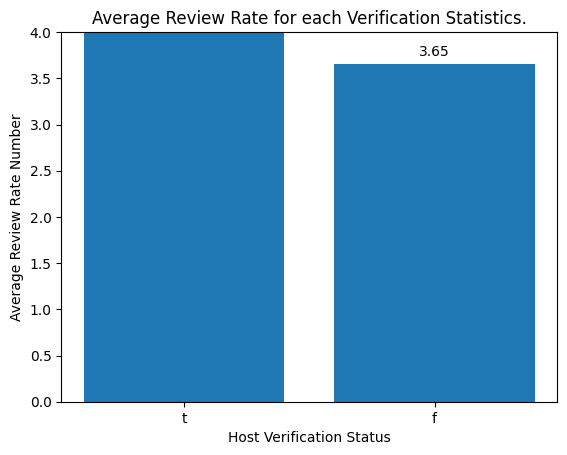

In [29]:
review_bar = plt.bar(review.index, review.loc[:,"review rate number"]);
plt.bar_label(review_bar, labels = round(review.loc[:,"review rate number"],2),padding = 4 );
plt.ylim([0,4]);

plt.xlabel('Host Verification Status');

plt.title('Average Review Rate for each Verification Statistics.');

plt.ylabel('Average Review Rate Number');

In [30]:
print(df.columns)

Index(['host_identity_verified', 'review rate number'], dtype='object')


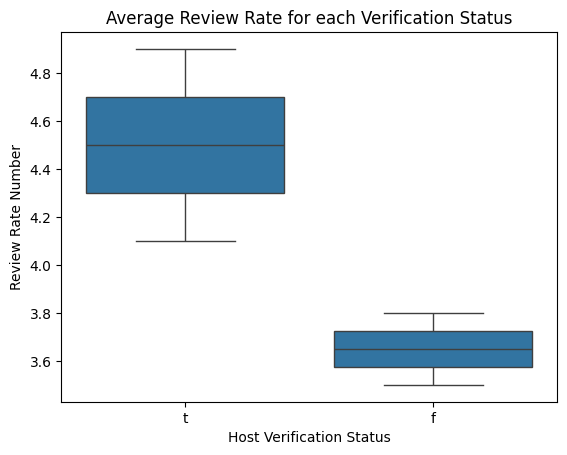

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Corrected code with the right column name
base_color = sns.color_palette()[0]
sns.boxplot(data=df, x="host_identity_verified", y="review rate number", color=base_color)
plt.xlabel('Host Verification Status')
plt.ylabel('Review Rate Number')
plt.title('Average Review Rate for each Verification Status')
plt.show()

In [32]:
print(df.columns)

Index(['host_identity_verified', 'review rate number'], dtype='object')


In [33]:
import pandas as pd

df = pd.DataFrame({
    'price $': [100, 150, 200, 250],
    'service_fee$_$': [10, 15, 20, 25]
})

df['price $'].corr(df['service_fee$_$'])

np.float64(1.0)

In [34]:
import pandas as pd

# Create a new DataFrame with the required columns
data = {
    'price $': [100, 150, 200, 250],
    'service_fee$_$': [10, 15, 20, 25]
}
df = pd.DataFrame(data)

# Inspect the columns
print(df.columns)

# Run your analysis code
corr_val = df['price $'].corr(df['service_fee$_$'])
print(corr_val)

Index(['price $', 'service_fee$_$'], dtype='object')
1.0


In [35]:
print(df.columns)

Index(['price $', 'service_fee$_$'], dtype='object')


In [36]:
import pandas as pd

# Create a new DataFrame with the required columns
data = {'price $': [100, 150, 200, 250],
        'service_fee$_$': [10, 15, 20, 25]}
df = pd.DataFrame(data)

# Now you can inspect the columns
print(df.columns)

# Run your analysis code
df['price $'].corr(df['service_fee$_$'])

Index(['price $', 'service_fee$_$'], dtype='object')


np.float64(1.0)

In [37]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame, here's a sample for demonstration
data = {'neighbourhood group': ['A', 'A', 'B', 'B'],
        'room type': ['Entire home/apt', 'Private room', 'Entire home/apt', 'Private room'],
        'review rate number': [4.5, 3.8, 4.9, 4.1]}
df = pd.DataFrame(data)

# Corrected code with proper syntax
arrn = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()

print(arrn)

                                     review rate number
neighbourhood group room type                          
A                   Entire home/apt                 4.5
                    Private room                    3.8
B                   Entire home/apt                 4.9
                    Private room                    4.1


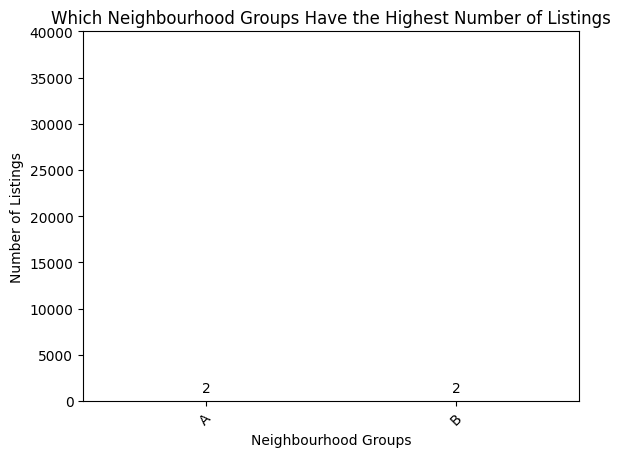

In [38]:
import matplotlib.pyplot as plt

# Create value counts DataFrame
hood_group = df['neighbourhood group'].value_counts().to_frame(name='count')

# Plot
hood_group_bar = plt.bar(hood_group.index, hood_group['count'])

# Add labels on top of bars
plt.bar_label(hood_group_bar, labels=hood_group['count'], padding=4)

# Chart formatting
plt.ylim([0, 40000])
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.title('Which Neighbourhood Groups Have the Highest Number of Listings')

plt.show()

Chart created successfully and saved as 'top_10_listings_chart.png'.


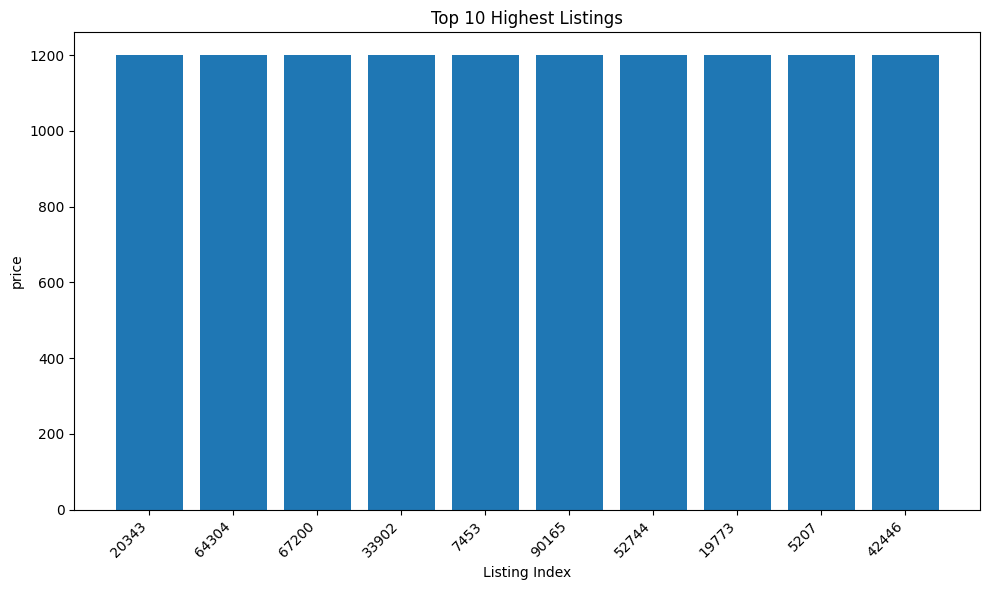

In [6]:


import pandas as pd
import matplotlib.pyplot as plt

# Define file name and column name
file_name = '/content/1730285881-Airbnb_Open_Data.xlsx'
column_name = 'price'  # Replace this with the actual column name you want to analyze

try:
    # Read the Excel file into a DataFrame
    df = pd.read_excel(file_name)

    # Check if the column exists in the DataFrame
    if column_name not in df.columns:
        print(f"Error: The column '{column_name}' was not found in the file.")
    else:
        # Sort the DataFrame by the specified column in descending order
        df_sorted = df.sort_values(by=column_name, ascending=False)

        # Select the top 10 listings
        top_10_listings = df_sorted.head(10)

        # Create a bar chart
        plt.figure(figsize=(10, 6))
        plt.bar(
            top_10_listings.index.astype(str),  # Use string indices for labels
            top_10_listings[column_name]
        )
        plt.title('Top 10 Highest Listings')
        plt.xlabel('Listing Index')
        plt.ylabel(column_name)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()

        # Save the chart as an image file
        plt.savefig('top_10_listings_chart.png')
        print("Chart created successfully and saved as 'top_10_listings_chart.png'.")

except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found. Please check the path.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

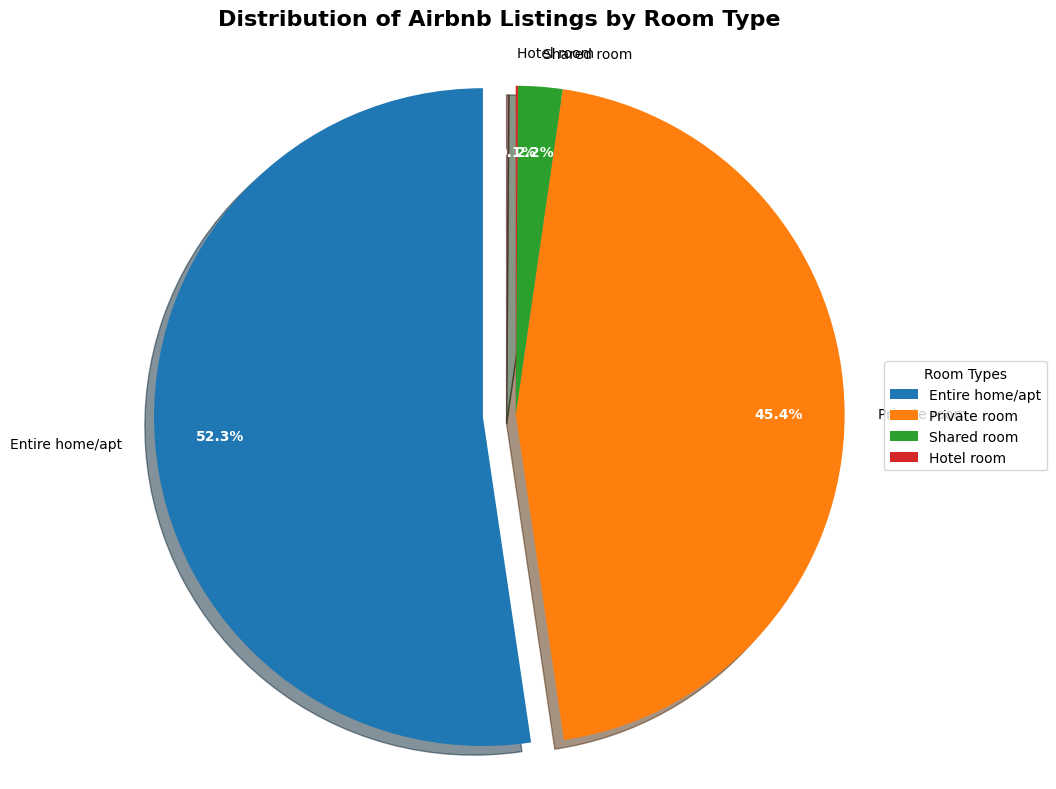

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Define the filename and column
FILE_NAME = '/content/1730285881-Airbnb_Open_Data.xlsx'
ROOM_TYPE_COL = 'room type'

try:
    # Load the dataset using read_excel for .xlsx files
    df = pd.read_excel(FILE_NAME)

    # Clean column names
    df.columns = df.columns.str.strip()

    if ROOM_TYPE_COL not in df.columns:
        print(f"Error: Required column ('{ROOM_TYPE_COL}') not found in the file.")
    else:
        # Count listings per room type
        room_type_counts = df[ROOM_TYPE_COL].value_counts()

        labels = room_type_counts.index
        sizes = room_type_counts.values

        # Explode the largest slice for emphasis
        explode = [0.1 if i == sizes.argmax() else 0 for i in range(len(sizes))]

        fig, ax = plt.subplots(figsize=(10, 8))
        wedges, texts, autotexts = ax.pie(
            sizes,
            labels=labels,
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            explode=explode,
            pctdistance=0.8
        )

        ax.axis('equal')  # Make pie chart circular
        ax.set_title(
            'Distribution of Airbnb Listings by Room Type',
            fontsize=16,
            fontweight='bold',
            pad=20
        )

        # Style the percentage texts
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_weight('bold')

        # Add legend outside the pie chart
        ax.legend(wedges, labels,
                  title="Room Types",
                  loc="center left",
                  bbox_to_anchor=(1, 0, 0.5, 1))

        plt.tight_layout()  # Adjust layout to accommodate legend
        plt.show()

except FileNotFoundError:
    print(f"Error: The file '{FILE_NAME}' was not found. Please upload the file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# New Section

In [11]:
# Find valid price column by checking columns
print(df.columns)

# Then filter using the exact column name you find
free_listings = df[df['price'] == 0]  # Adjust column name as needed
print(free_listings)

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')
Empty DataFrame
Columns: [id, NAME, host id, host_identity_verified, host name, neighbourhood group, neighbourhood, lat, long, country, country code, instant_bookable, cancellation_policy, room type, Construction year, price, service fee, minimum nights, number of reviews, last review, reviews per month, review rate number, calculated host listings count, availability 365, house_rules, license]
Index: []

[0 rows x 26 columns]
